In [110]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
import re
import string
import random

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zhoub\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhoub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zhoub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [79]:
data = pd.read_csv('data.csv')
data.groupby(['genre']).count().sort_values(by='index')['index']

genre
psychology     100
sports         100
travel         100
romance        111
crime          500
history        600
horror         600
science        647
fantasy        876
thriller      1023
Name: index, dtype: int64

Because of the unbalanced dataset, divide the dataset into two parts. First part, all classes have around 100 samples, which are psycology, sports, travel and romance. All other classes are in the second part. 

In [80]:
gerne_num = data.groupby(['genre']).count().sort_values(by='index')['index']
keep_gerne = list(gerne_num[gerne_num > 111].index)
df_data = data[data.genre.isin(keep_gerne)]
df_data

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...
...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [84]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [89]:
df_data['clean_text'] = df_data['summary'].apply(lambda x: finalpreprocess(x))

<ipython-input-89-4d986d75b4d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['clean_text'] = df_data['summary'].apply(lambda x: finalpreprocess(x))


In [91]:
df_data['clean_title'] = df_data['title'].apply(lambda x: finalpreprocess(x))

<ipython-input-91-9a72fdb8b249>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['clean_title'] = df_data['title'].apply(lambda x: finalpreprocess(x))


In [94]:
df_data

,index,title,genre,summary,clean_text,clean_title
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drown wednesday first trustee among morrow day...,drown wednesday
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...,lose hero
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...,cugel easily persuade merchant fianosther atte...,eye overworld
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...,book open herald mage vanyel return country va...,magic promise
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...,taran gurgi return caer dallben follow event t...,taran wanderer
...,...,...,...,...,...,...
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ...",atticus osullivan last druid live peacefully a...,hound
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...,charlie bucket wonderful adventure begin find ...,charlie chocolate factory
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be...",live dream child bear free say like land fathe...,red rising
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ...",rise love dimitri dimitri might love tasha mas...,frostbite


In [124]:
genre = list(set(df_data.genre))
index_li = []
for g in genre:
    df_temp = list(df_data[df_data.genre == g]['index'])
    index_li += random.sample(df_temp, k=500)
df_balance = df_data[df_data['index'].isin(index_li)]
df_balance

,index,title,genre,summary,clean_text,clean_title
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...,drown wednesday first trustee among morrow day...,drown wednesday
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ...",book open jason awakens school bus unable reme...,lose hero
5,5,Thendara House,fantasy,The novel concerns the dwelling of the Darkov...,novel concern dwell darkovan order renunciates...,thendara house
6,6,The Thief,fantasy,"Gen is released from prison by the magus, the...",gen release prison magus king scholar magus fi...,thief
7,7,The Sweet Far Thing,fantasy,The prologue begins with two men who are sear...,prologue begin two men search river london thr...,sweet far thing
...,...,...,...,...,...,...
4648,4648,The Time Traveler's Wife,fantasy,This is the extraordinary love story of Clare ...,extraordinary love story clare henry meet clar...,time traveler wife
4651,4651,Fantastic Beasts and Where to Find Them: The O...,fantasy,J.K. Rowling's screenwriting debut is captured...,j k rowling screenwriting debut capture exciti...,fantastic beast find original screenplay
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...,charlie bucket wonderful adventure begin find ...,charlie chocolate factory
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ...",rise love dimitri dimitri might love tasha mas...,frostbite


In [125]:
df_balance.drop(columns=['index']).to_csv('data_processed.csv',index=False)

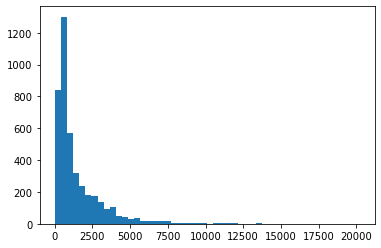

In [69]:
len_li = []

for i in range(len(processed_summ)):
    len_li.append(len(processed_summ[i]))

plt.hist(len_li,bins=50)
plt.show()